## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Microsoft Studios
- Building a strategy to make money in the film industry by looking at foreign and domestic values, production budgets and studios.

### Approach
- We want to be profitable and make money
    Comparing production costs to gross costs to see if there is any trend between money spent and money earned. Is there more money to be made in the domestic zone, foreign zone or both? Analyzing how other studios handle their investments and what works well for them, what is the tried and tested model and how can we replicate that?
    - 

### Thesis Questions

- *Question* - Do successful movies trend more towards foreign or domestic markets? (Sum Domestic VS Sum Foreign)
    - domestic_gross
    - foreign_gross
    - Extra - Profit(Gross - Budget, Mean of Difference)

- *Question* - production_budget against worldwide_gross (If I spend more money will it make more money)
    - production_budget
    - worldwide_gross
    
- *Question* - Is there a studio that seems to attract a certain level of success?
    - Studios
    - Mean worldwide gross
    - Extra - Profit(Gross - Budget, Mean of Difference, list             against studio)
- *Question* - Is there an amount spend in the budget that studios don't exceed OR Is there a direct relationship to amount spent in production Vs. How much is actually made?|

In [288]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [289]:
os.listdir("zippedData/")
files = glob.glob("zippedData/*")
#files

### Studio, Gross & Year Dataset

In [290]:
df0 = pd.read_csv(files[0])

In [291]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Release Dates, Budgets, Gross Dataset


In [292]:
df10 = pd.read_csv(files[10])

In [293]:
#df10.info()

### Sum Domestic Vs. Sum Foreign
- Do successful movies trend to be making more in the Foreign sector or Domestic?

In [294]:
#Sum for Domestic
domestic_gross_sum = df0['domestic_gross'].sum()
#print(domestic_gross_sum)

#Sum for Foreign
df0['foreign_gross'] = df0['foreign_gross'].astype('str')

df0['foreign_gross'] = df0['foreign_gross'].str.replace(',', '').astype(float)

foreign_gross_sum = df0['foreign_gross'].sum()
#print(foreign_gross_sum)

#Creating Total Column for last visual
df0["total_gross"]=df0["domestic_gross"]+df0["foreign_gross"]

#Domestic minus Foreign/Foreign minus Domestic
foreign_gross_sum - domestic_gross_sum

foreign_sum_percentage = 100 * foreign_gross_sum/(foreign_gross_sum + domestic_gross_sum)
domestic_sum_percentage = 100 * domestic_gross_sum/(foreign_gross_sum + domestic_gross_sum)
#print(foreign_sum_percentage)
#print(domestic_sum_percentage)

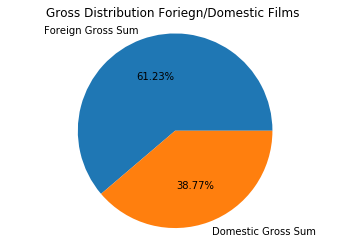

In [295]:
labels = 'Foreign Gross Sum', 'Domestic Gross Sum'
sizes = [foreign_sum_percentage, domestic_sum_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.title('Gross Distribution Foriegn/Domestic Films ')
plt.show()

### Production Budget Vs. Worldwide Gross
    - Positive trend
    - If we spend more, we're likely to make more

In [307]:
#Sum of Production Expenditures
df10['production_budget'] = df10['production_budget'].astype('str')
df10['production_budget'] = df10['production_budget'].str.replace('$', '')
df10['production_budget'] = df10['production_budget'].str.replace(',', '').astype(float)

#Worldwide Gross
df10['worldwide_gross'] = df10['worldwide_gross'].astype('str')
df10['worldwide_gross'] = df10['worldwide_gross'].str.replace('$', '')
df10['worldwide_gross'] = df10['worldwide_gross'].str.replace(',', '').astype(float)

#Domestic Gross
df10['domestic_gross'] = df10['domestic_gross'].astype('str')
df10['domestic_gross'] = df10['domestic_gross'].str.replace('$', '')
df10['domestic_gross'] = df10['domestic_gross'].str.replace(',', '').astype(float)

In [308]:

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    Code Sourced from "https://dfrieds.com/data-visualizations/how-format-large-tick-values.html"
    """
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format


In [309]:
#Oldest to Newest
df10['release_date'] = df10['release_date'].astype('str')
df10['release_date'] = pd.to_datetime(df10['release_date'])
df10.sort_values(by=['release_date'], inplace=True)
#df10.head()

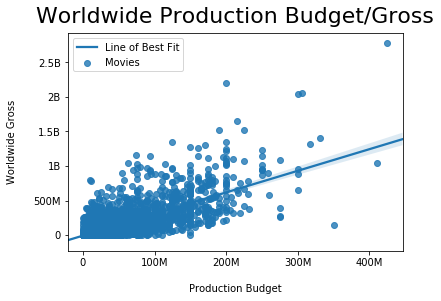

In [310]:
### Final Interation

sns.regplot(data = df10, x = 'production_budget', y = 'worldwide_gross')
plt.xlabel("Production Budget", labelpad=16)
plt.ylabel("Worldwide Gross", labelpad=16)
plt.title("Worldwide Production Budget/Gross", y=1.02, fontsize=22)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.legend(['Line of Best Fit', 'Movies'])
plt.show()

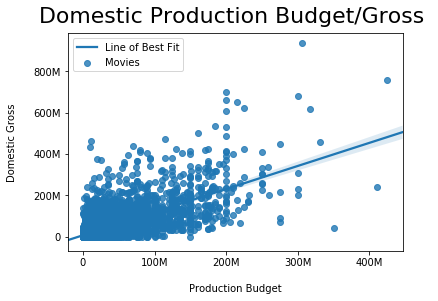

In [311]:
### Final Iteration

sns.regplot(data = df10, x = 'production_budget', y = 'domestic_gross')
plt.xlabel("Production Budget", labelpad=16)
plt.ylabel("Domestic Gross", labelpad=16)
plt.title("Domestic Production Budget/Gross ", y=1.02, fontsize=22)

ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.legend(['Line of Best Fit', 'Movies'])
plt.show()

### Worldwide Gross Over Last Decade

In [312]:
#df10.head()

In [313]:
df10["year"] = df10["release_date"].dt.year
#df10.head()

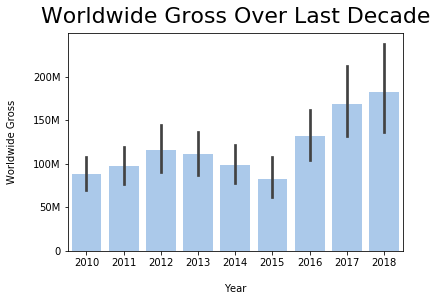

In [314]:
### Generate Worldwide Visual (1/2)

df10['year'] = df10['year'].astype('int')
df10year = df10.query('year >= 2010 & year <= 2018')

sns.set_color_codes('pastel')
sns.barplot(data=df10year, x = "year", y = "worldwide_gross", color = 'b')
plt.xlabel("Year", labelpad=16)
plt.ylabel("Worldwide Gross", labelpad=16)
plt.title("Worldwide Gross Over Last Decade", y=1.02, fontsize=22)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

### Domestic Gross Over Last Decade

In [315]:
#Sum of Production Expenditures
df10['production_budget'] = df10['production_budget'].astype('str')
df10['production_budget'] = df10['production_budget'].str.replace('$', '')
df10['production_budget'] = df10['production_budget'].str.replace(',', '').astype(float)

#Worldwide Gross
df10['domestic_gross'] = df10['domestic_gross'].astype('str')
df10['domestic_gross'] = df10['domestic_gross'].str.replace('$', '')
df10['domestic_gross'] = df10['domestic_gross'].str.replace(',', '').astype(float)

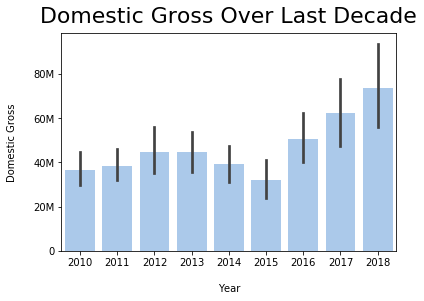

In [316]:
# Generate Domestic Visual (2/2)

sns.set_color_codes('pastel')
sns.barplot(data=df10year, x = "year", y = "domestic_gross", color = 'b')
plt.xlabel("Year", labelpad=16)
plt.ylabel("Domestic Gross", labelpad=16)
plt.title("Domestic Gross Over Last Decade", y=1.02, fontsize=22)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

### Domestic & Worldwide Gross Over Last Decade

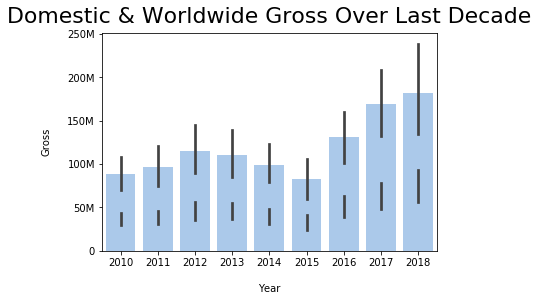

In [317]:
### Final Iteration

sns.set_color_codes('pastel')
sns.barplot(data=df10year, x = "year", y = "domestic_gross")
sns.barplot(data=df10year, x = "year", y = "worldwide_gross", color = 'b')
plt.xlabel("Year", labelpad=16)
plt.ylabel("Gross", labelpad=16)
plt.title("Domestic & Worldwide Gross Over Last Decade", y=1.02, fontsize=22)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

### Studios & Domestic & Foreign Gross

In [318]:
studio = df0['studio']
domestic_gross = df0['domestic_gross']
foreign_gross = df0['foreign_gross']

df0['foreign_gross'] = df0['foreign_gross'].astype('str')
df0['foreign_gross'] = df0['foreign_gross'].str.replace(',', '').astype(float)

df0year = df0.query('year >= 2010 & year <= 2018')
df0year.sort_values(by=['year'], inplace=True)

studioyearfiltered = df0.groupby(df0['studio'], as_index=False)['domestic_gross', 'foreign_gross', 'total_gross'].sum().reset_index()

domestic_gross_filtered = studioyearfiltered.query('domestic_gross >= 500000000')
foreign_gross_filtered = studioyearfiltered.query('foreign_gross >= 500000000')

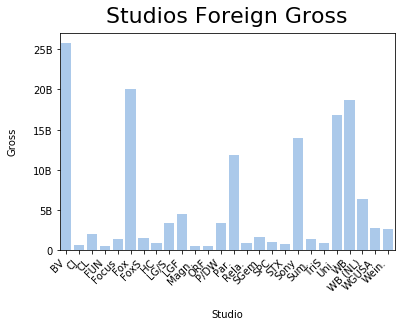

In [319]:
### Foreign Work

sns.set_color_codes('pastel')
#barplot = sns.barplot(data=domestic_gross_filtered, x = "studio", y = "domestic_gross", color = "b")
barplot2 = sns.barplot(data=foreign_gross_filtered, x = "studio", y = "foreign_gross", color = 'b')
plt.xlabel("Studio", labelpad=16)
plt.ylabel("Gross", labelpad=16)
plt.title("Studios Foreign Gross", y=1.02, fontsize=22)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
barplot2.set_xticklabels(barplot2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

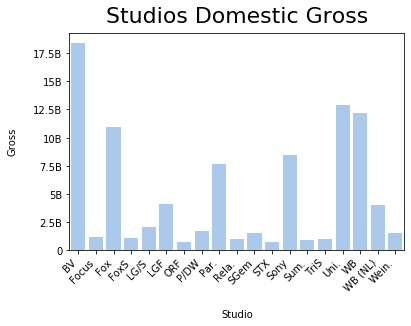

In [320]:
### Domestic Work

sns.set_color_codes('pastel')
barplot = sns.barplot(data=domestic_gross_filtered, x = "studio", y = "domestic_gross", color = "b")
#sns.barplot(data=foreign_gross_filtered, x = "studio", y = "foreign_gross", color = 'r')
plt.xlabel("Studio", labelpad=16)
plt.ylabel("Gross", labelpad=16)
plt.title("Studios Domestic Gross", y=1.02, fontsize=22)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

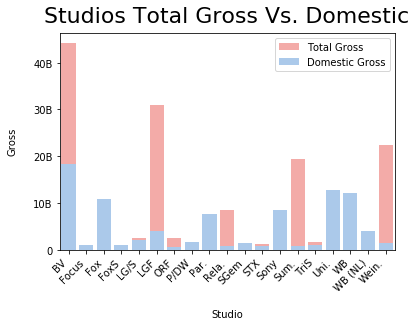

In [321]:
### Final Iteration

sns.set_color_codes('pastel')
ax=plt.gca()
barplot = sns.barplot(data=foreign_gross_filtered, x = "studio", y = "total_gross", color = 'r', ax=ax, label="Total Gross")

ax2 = plt.gca()
barplot2 = sns.barplot(data=domestic_gross_filtered, x = "studio", y = "domestic_gross", color = "b", ax=ax2, label="Domestic Gross")

plt.xlabel("Studio", labelpad=16)
plt.ylabel("Gross", labelpad=16)
plt.title("Studios Total Gross Vs. Domestic", y=1.02, fontsize=22)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend()
plt.show()

### Conclusion
- There is growth in the foreign market
    - If we can appeal to all peoples and unifying things about our species, we can blow this out of the park
- We should build off the back of success that has worked for others studios
- Don't spend more than half of what you're expecting to make
    - You get what you put in
        - Can't expect to make a billion off of a shrimp budget
        - Be realistic with your profit goals, don't overextend production budgets.